# House Prices: Advanced Regression Techniques

A Kaggle competition on predicting sales prices and practice feature engineering, regression techniques such as random forests, and gradient boosting 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
# Scoring function
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## 1- Load libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## 2- Import and preprocess data

In [3]:
data_df = pd.read_csv('data/train.csv')
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data_df = pd.read_csv('data/test.csv')
test_data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data_df.shape

(1460, 81)

In [6]:
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_data_df.shape

(1459, 80)

Make a copy of data_df and test_data_df for preprocessing.

In [8]:
train_df = data_df.copy()
test_df = test_data_df.copy()

## 3- Build something quick and dirty as a baseline model

In [9]:
columns = list(data_df.select_dtypes(include=['int64', 'float64']).columns)

In [10]:
columns.remove('SalePrice')
columns.remove('Id')

In [11]:
X = data_df[columns].copy()
X.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [12]:
X['LotFrontage'].fillna(X['LotFrontage'].median(), inplace=True)
X['GarageYrBlt'].fillna(X['GarageYrBlt'].median(), inplace=True)
X['MasVnrArea'].fillna(X['MasVnrArea'].mean(), inplace=True)

# Check if there is still any missing values
X.isnull().sum().sum()

0

In [13]:
y = data_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [14]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
# Now train a quick model
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_scaled, y, random_state=0)

print('Number of examples in the traning set:', X_train.shape[0])
print('Number of examples in the development set:', X_dev.shape[0])

Number of examples in the traning set: 1095
Number of examples in the development set: 365


In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train, y_train)
print('R2 score on the train set: ', LR.score(X_train, y_train))
print('R2 score on the dev set: ', LR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(LR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(LR.predict(X_dev), y_dev))

R2 score on the train set:  0.8449041846454979
R2 score on the dev set:  0.6806615178006672
Mean squared error on the train set 0.18546361028811997
Mean squared error on the dev set 0.1995872461580381


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss='ls', learning_rate=0.5, n_estimators=10, max_depth=3, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', GBR.score(X_train, y_train))
print('R2 score on the dev set: ', GBR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(GBR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(GBR.predict(X_dev), y_dev))

R2 score on the train set:  0.9333336681705634
R2 score on the dev set:  0.839052235237028
Mean squared error on the train set 0.12704264100779403
Mean squared error on the dev set 0.15230813513541422


In [18]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10, max_features=10, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', RFR.score(X_train, y_train))
print('R2 score on the dev set: ', RFR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(RFR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(RFR.predict(X_dev), y_dev))

R2 score on the train set:  0.9654141086205886
R2 score on the dev set:  0.8343022708156171
Mean squared error on the train set 0.07561940607966615
Mean squared error on the dev set 0.14707982216394416


All methods appear to be overfitting badly. Now what will happen if I just submit this nobrainer model?

### Check CV score from GBRegressor

In [19]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(GBR, X, y, cv=5, scoring='neg_mean_squared_log_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 0.16019597906240274


Try submitting the solution with GradientBoostingRegressor



In [20]:
X_test = test_df[columns].copy()
X_test['LotFrontage'].fillna(X_test['LotFrontage'].median(), inplace=True)
X_test['GarageYrBlt'].fillna(X_test['GarageYrBlt'].median(), inplace=True)
X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].mean(), inplace=True)
X_test['BsmtFinSF1'].fillna(X_test['BsmtFinSF1'].mean(), inplace=True)
X_test['BsmtFinSF2'].fillna(X_test['BsmtFinSF2'].mean(), inplace=True)
X_test['BsmtUnfSF'].fillna(X_test['BsmtUnfSF'].mean(), inplace=True)
X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mean(), inplace=True)
X_test['BsmtFullBath'].fillna(X_test['BsmtFullBath'].mean(), inplace=True)
X_test['BsmtHalfBath'].fillna(X_test['BsmtHalfBath'].mean(), inplace=True)
X_test['GarageCars'].fillna(X_test['GarageCars'].mean(), inplace=True)
X_test['GarageArea'].fillna(X_test['GarageArea'].mean(), inplace=True)

X_test.isnull().sum().sum()

0

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
y_pred = GBR.predict(X_test_scaled)
answer = pd.DataFrame(data=y_pred, columns=['SalePrice'])
answer.insert(loc=0, column='Id', value=test_df['Id'])

answer.to_csv('data/submission.csv', index=False)

This results in an abysmal score, as expected, of 0.24740, which put me in position 89%. Yucky! Now, let's try a more serious job.

Before we go into the next (and much needed) step, however, let's check out another model that's supposed to be an improvement on GBRegressor.

In [23]:
import xgboost
from xgboost.sklearn import XGBRegressor
XGBR =  XGBRegressor(loss='ls', learning_rate=0.5, n_estimators=10, max_depth=3, random_state=0).fit(X_train, y_train)
print('R2 score on the train set: ', XGBR.score(X_train, y_train))
print('R2 score on the dev set: ', XGBR.score(X_dev, y_dev))
print('Mean squared error on the train set', rmsle(XGBR.predict(X_train), y_train))
print('Mean squared error on the dev set', rmsle(XGBR.predict(X_dev), y_dev))

R2 score on the train set:  0.9291029921083804
R2 score on the dev set:  0.768537821471009
Mean squared error on the train set 0.1297282246229444
Mean squared error on the dev set 0.15871549924118356


/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Now, train on the log of the sale prices to see if it makes a difference. Also, use cross val score to compare with models trained later.

In [24]:
y2 = np.log(data_df['SalePrice'] +1)
y_train2 = np.log(y_train + 1)
y_dev2 = np.log(y_dev + 1)

GBR2 = GradientBoostingRegressor(loss='ls', learning_rate=0.5, n_estimators=10, max_depth=3, random_state=0).fit(X_train, y_train2)
y_pred_train = np.exp(GBR2.predict(X_train)) - 1
y_pred_dev = np.exp(GBR2.predict(X_dev)) - 1
print('R2 score on the train set: ', GBR2.score(X_train, y_train2))
print('R2 score on the dev set: ', GBR2.score(X_dev, y_dev2))
print('Mean squared error on the train set', rmsle(y_pred_train, y_train2))
print('Mean squared error on the dev set', rmsle(y_pred_dev, y_dev2)) 

cv_score2 = cross_val_score(GBR2, X, y2, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score2).mean())

R2 score on the train set:  0.916955038984754
R2 score on the dev set:  0.829792638700731
Mean squared error on the train set 9.462878565208843
Mean squared error on the dev set 9.465538132132805
Cross validation scores for GBR model: 0.15389100626192712


I don't really see much of an improvement here. However, note that:
* All models appear to overfit
* Because all these models are initialized with a random seed, for best competition performance, running the same models a number of times using different seeds and averaging over the results would be advised.

## 4- Exploratory Data Analysis

Below is the list of features given and their descriptions from Kaggle for reference.

Data fields

Here's a brief version of what you'll find in the data description file.

*  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
*  MSSubClass: The building class
*  MSZoning: The general zoning classification
*  LotFrontage: Linear feet of street connected to property
*  LotArea: Lot size in square feet
*  Street: Type of road access
*  Alley: Type of alley access
*  LotShape: General shape of property
*  LandContour: Flatness of the property
*  Utilities: Type of utilities available
*  LotConfig: Lot configuration
*  LandSlope: Slope of property
*  Neighborhood: Physical locations within Ames city limits
*  Condition1: Proximity to main road or railroad
*  Condition2: Proximity to main road or railroad (if a second is present)
*  BldgType: Type of dwelling
*  HouseStyle: Style of dwelling
*  OverallQual: Overall material and finish quality
*  OverallCond: Overall condition rating
*  YearBuilt: Original construction date
*  YearRemodAdd: Remodel date
*  RoofStyle: Type of roof
*  RoofMatl: Roof material
*  Exterior1st: Exterior covering on house
*  Exterior2nd: Exterior covering on house (if more than one material)
*  MasVnrType: Masonry veneer type
*  MasVnrArea: Masonry veneer area in square feet
*  ExterQual: Exterior material quality
*  ExterCond: Present condition of the material on the exterior
*  Foundation: Type of foundation
*  BsmtQual: Height of the basement
*  BsmtCond: General condition of the basement
*  BsmtExposure: Walkout or garden level basement walls
*  BsmtFinType1: Quality of basement finished area
*  BsmtFinSF1: Type 1 finished square feet
*  BsmtFinType2: Quality of second finished area (if present)
*  BsmtFinSF2: Type 2 finished square feet
*  BsmtUnfSF: Unfinished square feet of basement area
*  TotalBsmtSF: Total square feet of basement area
*  Heating: Type of heating
*  HeatingQC: Heating quality and condition
*  CentralAir: Central air conditioning
*  Electrical: Electrical system
*  1stFlrSF: First Floor square feet
*  2ndFlrSF: Second floor square feet
*  LowQualFinSF: Low quality finished square feet (all floors)
*  GrLivArea: Above grade (ground) living area square feet
*  BsmtFullBath: Basement full bathrooms
*  BsmtHalfBath: Basement half bathrooms
*  FullBath: Full bathrooms above grade
*  HalfBath: Half baths above grade
*  Bedroom: Number of bedrooms above basement level
*  Kitchen: Number of kitchens
*  KitchenQual: Kitchen quality
*  TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*  Functional: Home functionality rating
*  Fireplaces: Number of fireplaces
*  FireplaceQu: Fireplace quality
*  GarageType: Garage location
*  GarageYrBlt: Year garage was built
*  GarageFinish: Interior finish of the garage
*  GarageCars: Size of garage in car capacity
*  GarageArea: Size of garage in square feet
*  GarageQual: Garage quality
*  GarageCond: Garage condition
*  PavedDrive: Paved driveway
*  WoodDeckSF: Wood deck area in square feet
*  OpenPorchSF: Open porch area in square feet
*  EnclosedPorch: Enclosed porch area in square feet
*  3SsnPorch: Three season porch area in square feet
*  ScreenPorch: Screen porch area in square feet
*  PoolArea: Pool area in square feet
*  PoolQC: Pool quality
*  Fence: Fence quality
*  MiscFeature: Miscellaneous feature not covered in other categories
*  MiscVal: $Value of miscellaneous feature
*  MoSold: Month Sold
*  YrSold: Year Sold
*  SaleType: Type of sale
*  SaleCondition: Condition of sale

First, let's have a look at the range of sale prices, mean, median, as well as the heatmap plot to see how features are correlated.



In [25]:
# Range of housing prices
(data_df['SalePrice'].min(), data_df['SalePrice'].max())

(34900, 755000)

In [26]:
# mean price
data_df['SalePrice'].mean()

180921.19589041095

In [27]:
# median price
data_df['SalePrice'].median()

163000.0

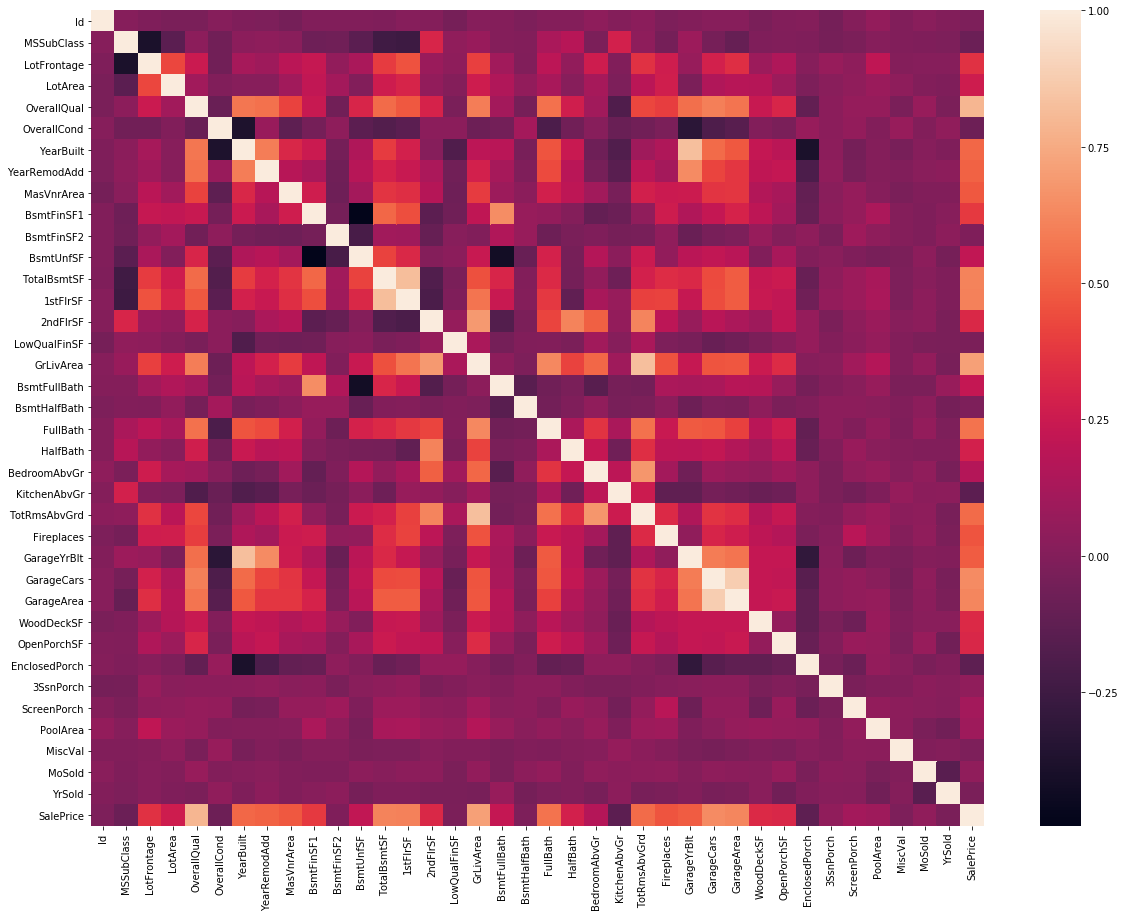

In [28]:
#Heatmap plot
plt.subplots(figsize=(20,15))
sns.heatmap(data=data_df.corr())

We can see at a glance that SalePrice is correlated more strongly to a number of features such as:
* OverallQual (Most strongly correlated)
* YearBuilt
* YearRemodAdd
* MasVnrArea
* TotalBsmtSF
* 1stFlrSF
* GrLivArea (2nd most strongly correlated)
* FullBath
* TotRmsAbvGrd
* GarageCars
* GarageArea

I note that some features that I personally think are important don't show up in the map:
* LotArea
* LotFrontage 

`LotFrontage` has 259 values missing so that may be why.

Let's have a look at the scatter plot `LotArea` vs. `SalePrice`.

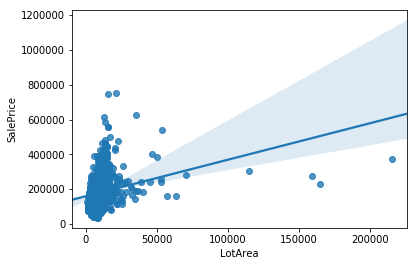

In [29]:
sns.regplot(data_df['LotArea'], data_df['SalePrice'])

There indeed doesn't seem to be as clear a correlation. Most houses have `LotArea` smaller than 25000 SF. Something to think about.

### OverallQual

This is definitely a key feature that decides the range of the sale price for each house. Let's have a closer look.

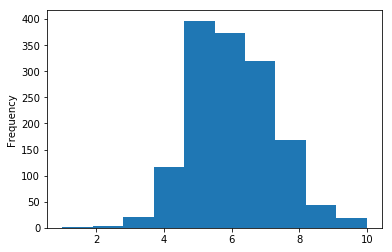

In [30]:
data_df['OverallQual'].plot.hist()

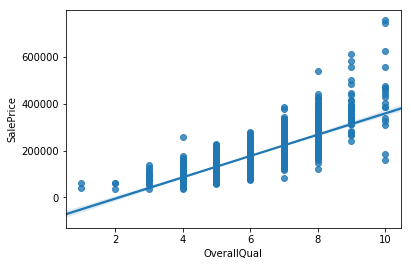

In [31]:
sns.regplot(data_df['OverallQual'], data_df['SalePrice'])

This is not very surprising that houses with higher overall quality get sold for higher prices. The distribution also looks very normal. However, note that the price range is quite large still given a particular value of OverallQual, especially for the highest quality OverallQual=10.

Now let's look at YearBuilt.

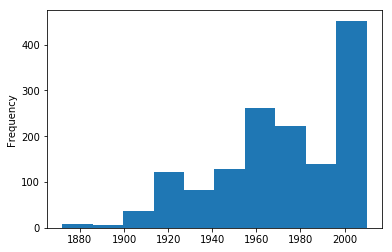

In [32]:
data_df['YearBuilt'].plot.hist()

It appears that more houses are built recently.

In [33]:
(data_df['YearBuilt'].min(), data_df['YearBuilt'].max())

(1872, 2010)

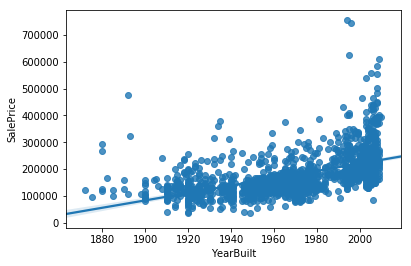

In [34]:
sns.regplot(data_df['YearBuilt'], data_df['SalePrice'])

There appears to be a week trend of increasing sale prices with how recent the house is. However, besides the normal variations, there appear to be some outliers.

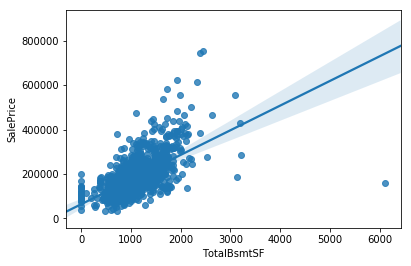

In [35]:
sns.regplot(data_df['TotalBsmtSF'], data_df['SalePrice'])

There is one point definitely out of the ordinary here with `TotalBsmtSF` > 6000 but very low `SalePrice`. Let's take a look.

In [36]:
data_df[data_df['TotalBsmtSF'] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


This point has identity `1298`. Let's add this to our list of outliers.

In [37]:
outliers = set(data_df[data_df['TotalBsmtSF'] > 6000].index.values)

print('Running list of outliers: ', outliers)

Running list of outliers:  {1298}


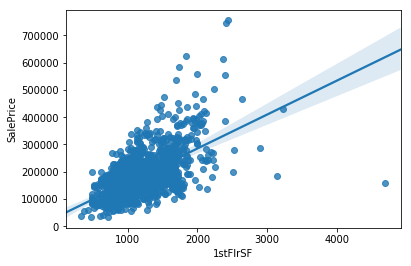

In [38]:
sns.regplot(data_df['1stFlrSF'], data_df['SalePrice'])

Again, one point appears very unusual here with `1stFlrSF` >> 4000 but very low `SalePrice`. Let's take a look.

In [39]:
data_df[data_df['1stFlrSF'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


This point is again the house number `1298` that is already in our running list of outliers!

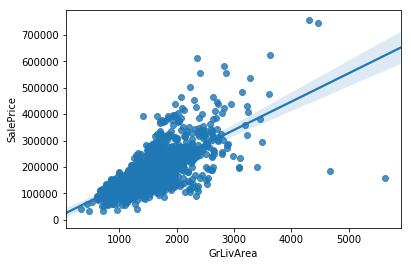

In [40]:
sns.regplot(data_df['GrLivArea'], data_df['SalePrice'])

Although it's a little bit harder to call, the points where `GrLivArea` > 4000 are out of the ordinary with extreme `SalePrice`. Let's have a look to see if our man `1298` is among them. I wouldn't be surprised.

In [41]:
data_df[data_df['GrLivArea'] > 4000].loc[:, ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


As expected, our man `1298` is among them.  This house must be haunted!!! However, there's also 3 new faces `523`, `691`, and `1182`. Before updating  our list of outliers, let's check zscore.

In [42]:
zscore = stats.zscore(data_df['GrLivArea'])
thresh = 4
print(np.where(zscore > thresh), zscore[np.where(zscore > thresh)])

(array([ 523,  691, 1169, 1182, 1298]),) [6.01662656 5.3313044  4.01967394 5.63589203 7.85557436]


It's quite obvious that house `1298` is very much an outlier here, but it's a harder call to make for others.  I think since the zscore for `1169` is quite lower than the others, I will for now call the 4 houses we discovered above outliers and add them to our running list.

In [43]:
outliers.update([outlier for outlier in list(np.where(data_df['GrLivArea'] > 4000)[0]) if outlier not in outliers])
print('Running list of outliers: ', outliers)

Running list of outliers:  {1298, 523, 691, 1182}


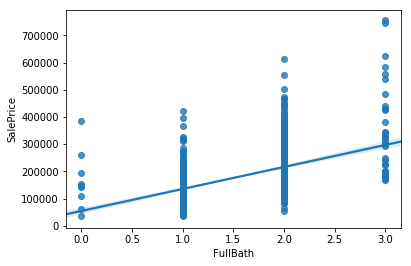

In [44]:
sns.regplot(data_df['FullBath'], data_df['SalePrice'])

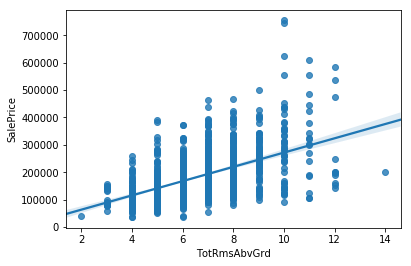

In [45]:
sns.regplot(data_df['TotRmsAbvGrd'], data_df['SalePrice'])

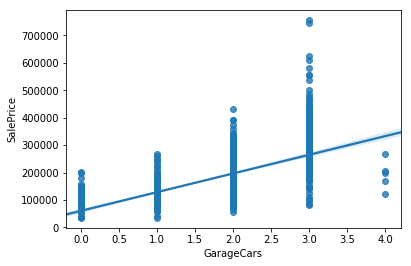

In [46]:
sns.regplot(data_df['GarageCars'], data_df['SalePrice'])

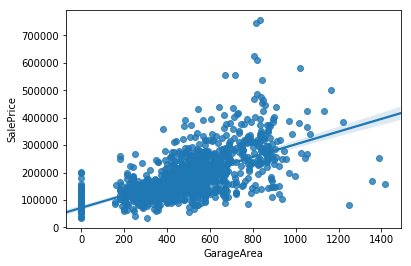

In [47]:
sns.regplot(data_df['GarageArea'], data_df['SalePrice'])

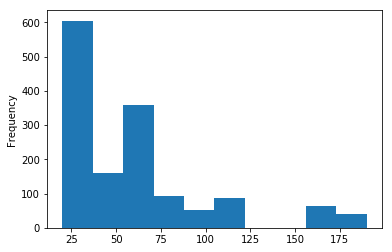

In [48]:
data_df['MSSubClass'].plot.hist()

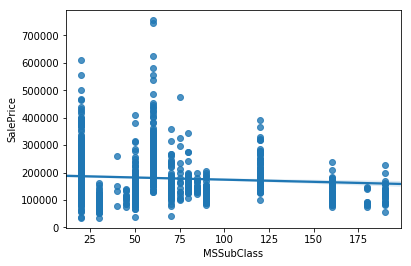

In [49]:
sns.regplot(data_df['MSSubClass'], data_df['SalePrice'])

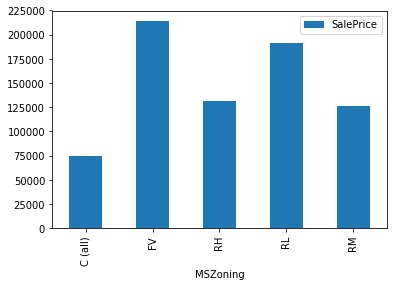

In [50]:
data_df[['MSZoning', 'SalePrice']].groupby(['MSZoning']).mean().plot(kind='bar')

## 5- Data Preprocessing: missing values
I got this idea from `firstbloodY` and found it useful.
https://www.kaggle.com/firstbloody/an-uncomplicated-model-top-2-or-top-1

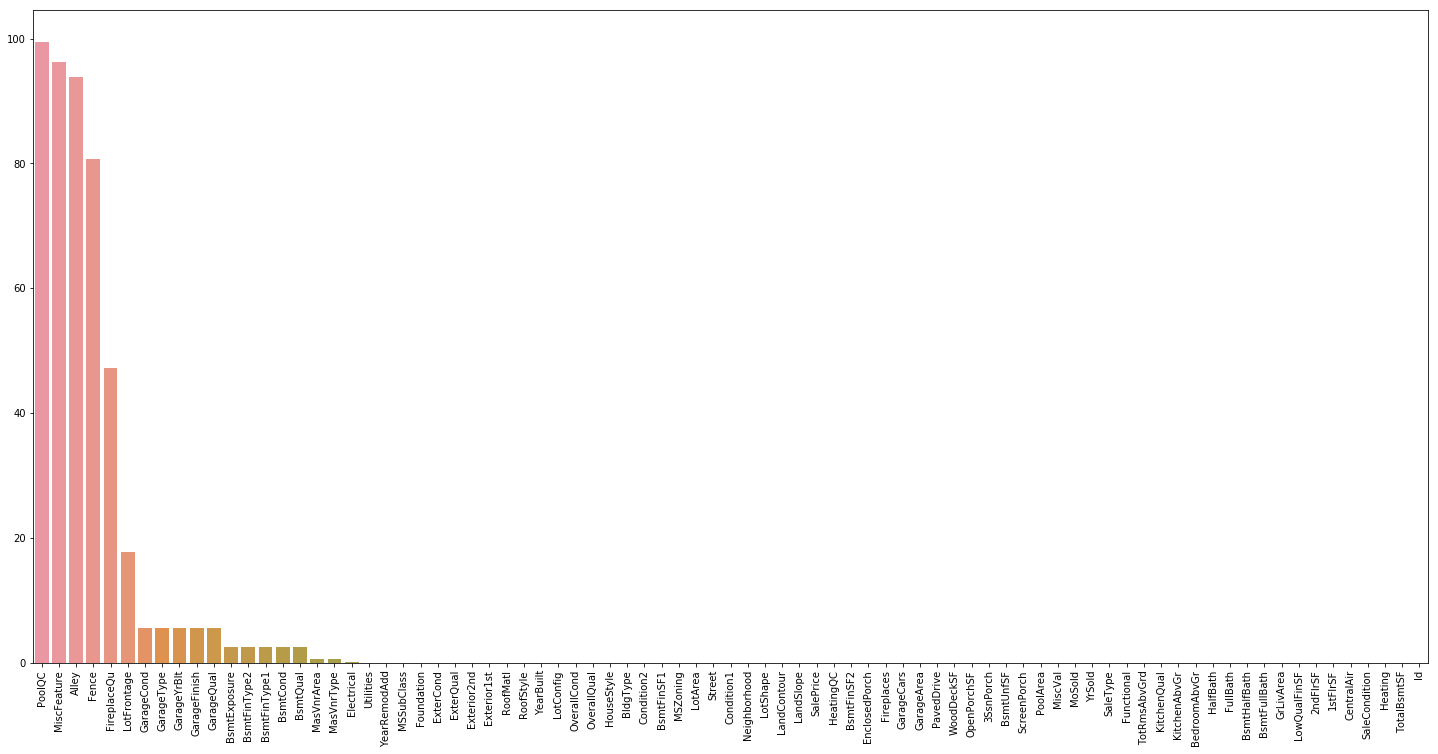

In [51]:
missing_data = (data_df.isnull().sum()/len(data_df)*100).sort_values(ascending=False)
plt.figure(figsize=(25, 12))
plt.xticks(rotation="90")
sns.barplot(missing_data.index, missing_data)

### PoolQC

In [52]:
data_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

According to the feature descriptions, this feature should have 5 possible values:
* Ex   Excellent
* Gd   Good
* TA   Average/Typical
* Fa   Fair
* NA   No Pool

Should all the missing values then be None (no pool) or something else?

In [53]:
data_df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [54]:
data_df[data_df['PoolArea'] != 0].loc[:, ['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
197,512,Ex
810,648,Fa
1170,576,Gd
1182,555,Ex
1298,480,Gd
1386,519,Fa
1423,738,Gd


It appears that all houses with missing values for `PoolQC` in the training set do not have a pool. All the missing values should therefore be filled with `None`. 

In [55]:
train_df['PoolQC'].fillna('None', inplace=True)

Now, let's look at the test set. There are also many missing values for `PoolQC`. Should all the missing values be filled with None also?

In [56]:
test_df['PoolQC'].isnull().sum()

1456

In [57]:
test_df[test_df['PoolArea'] != 0].loc[:, ['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
514,144,Ex
960,368,NaN
1043,444,NaN
1113,228,Ex
1139,561,NaN
1250,800,Gd


Now, there are 3 houses with nonzero `PoolArea` but no values for `PoolQC` that should not be filled in as `None` but perhaps `Fa`. The rest can be filled in as `None`.

In [58]:
test_df[(test_df['PoolArea'] != 0) & (test_df['PoolQC'].isnull())].loc[:, ['PoolQC']].fillna('Fa', inplace=True)
test_df['PoolQC'].fillna('None', inplace=True)

### MiscFeature

Next, look at `MiscFeature` where most values are missing. The possible values are:
* Elev Elevator
* Gar2 2nd Garage (if not described in garage section)
* Othr Other
* Shed Shed (over 100 SF)
* TenC Tennis Court
* NA   None

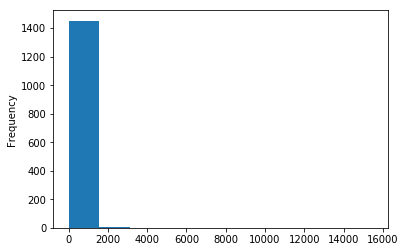

In [59]:
data_df['MiscVal'].plot.hist()

Since most of the `MiscFeature` results in 0 value, the missing values are probably filled with `None`. This feature therefore can be safely removed from the training data.

In [60]:
train_df.drop(columns=['MiscFeature'], inplace=True)

Now let's have a look at the test data.

Number of missing values in MiscFeature in test data =  1408


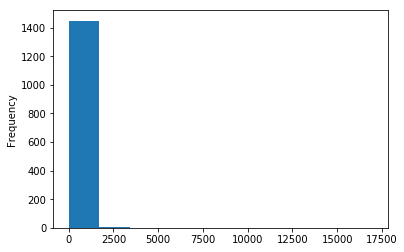

In [61]:
print('Number of missing values in MiscFeature in test data = ', test_df['MiscFeature'].isnull().sum())

test_df['MiscVal'].plot.hist()

Again, most misc features result in very little value and thus the type of features should not play an important role and can be safely removed.

In [62]:
test_df.drop(columns=['MiscFeature'], inplace=True)

### Alley

Now let's check out `Alley`. The possible values for `Alley` are:
* Grvl: Gravel
* Pave: Paved
* NA: No Alley

Usually most of the houses don't have alley and thus the missing values perhaps can be safely  filled with `None`. I should consider removing this feature all together.

In [63]:
train_df['Alley'].fillna('None', inplace=True)
test_df['Alley'].fillna('None', inplace=True)

### Fence

The possible values for `Fence` are:
* GdPrv: Good privacy
* MnPrv: Minium privacy
* GdWo: Good wood
* MnWw: Minium wood/wire
* NA: No fence

Most houses probably don't have fences and hence the missing values are filled with `None`. This feature can be also considered a miscellaneous feature, and it's value, if any, has already been included in `MiscVal`, so can be ignored. Let's drop it from the training and test set.

In [64]:
train_df.drop(columns=['Fence'], inplace=True)
test_df.drop(columns=['Fence'], inplace=True)

### FireplaceQu

The possible values for `FireplaceQu` are:
* Ex	Excellent - Exceptional Masonry Fireplace
* Gd	Good - Masonry Fireplace in main level
* TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa	Fair - Prefabricated Fireplace in basement
* Po	Poor - Ben Franklin Stove
* NA	No Fireplace

In [65]:
print('Number of missing values in FireplaceQu = ', data_df['FireplaceQu'].isnull().sum())
print('Number of missing values in Fireplaces = ', data_df['Fireplaces'].isnull().sum())

Number of missing values in FireplaceQu =  690
Number of missing values in Fireplaces =  0


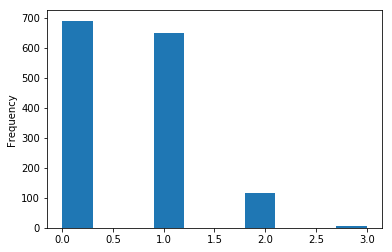

In [66]:
data_df['Fireplaces'].plot.hist()

It appears that about half of the houses don't have a fireplace. Perhaps this half is the one with no fireplace quality. In addition, `FireplaceQu` can be considered a `MiscFeature` and perhaps can be removed.

In [67]:
len(data_df[(data_df['Fireplaces']!=0) & (data_df['FireplaceQu'].isnull())])

0

Now go on to the test set. Doublecheck that no house has missing values in `FireplaceQu` with at least a fireplace.

In [68]:
len(test_df[(test_df['Fireplaces']!=0) & (test_df['FireplaceQu'].isnull())])

0

So as predicted, all houses with missing values in `FireplaceQu` don't have a fireplace, so the missing values should be filled with `None` for both the train set and test set.

In [69]:
train_df['FireplaceQu'].fillna('None', inplace=True)

In [70]:
test_df['FireplaceQu'].fillna('None', inplace=True)

### LotFrontage

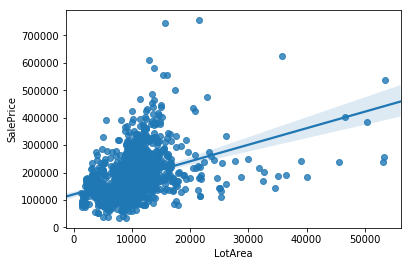

In [71]:
temp = data_df[data_df['LotArea'] < 55000]
sns.regplot(temp['LotArea'], temp['SalePrice'])

Let's fill in the missing values for `LotFrontage` with the median. I think we can fill in the missing values with the mean, but median is slightly better in my opinion in case of a skewed distribution or outliers present. 

In [72]:
data_df['LotFrontage'].mean()

70.04995836802665

In [73]:
data_df['LotFrontage'].median()

69.0

Let's have a look at the distribution of LotFrontage.

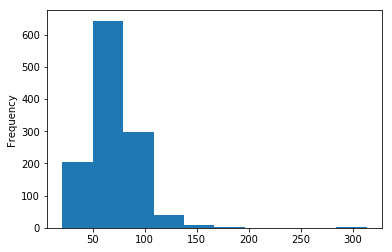

In [74]:
data_df['LotFrontage'].plot.hist()

It turns out to not matter in this case weather we choose the mean or the median anyway.

In [75]:
train_df['LotFrontage'].fillna(data_df['LotFrontage'].median(), inplace=True)

Do the same for the test set, but first, check how many missing values there are and if the mean, median, and distribution look reasonable.

In [76]:
print('Number of missing values for LotFrontage in test set = ', test_df['LotFrontage'].isnull().sum())
print('Mean = ', test_df['LotFrontage'].mean())
print('Median = ', test_df['LotFrontage'].median())

Number of missing values for LotFrontage in test set =  227
Mean =  68.58035714285714
Median =  67.0


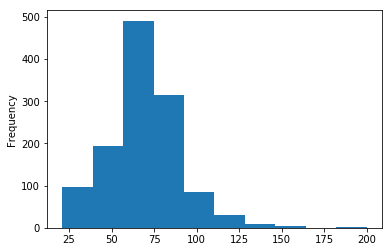

In [77]:
test_df['LotFrontage'].plot.hist()

As the mean and median and distribution look similar enough to that of the training data, I think the missing values can be safely filled with the median.

In [78]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(), inplace=True)

Now let's have a look at the relationship between `LotFrontage` and `SalePrice`.

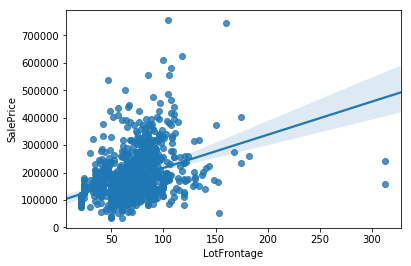

In [79]:
sns.regplot(data_df['LotFrontage'], data_df['SalePrice'])

Two points appear to be outliers from the plot above where `LotFrontage` > 300. We can double check these points are outliers using Seaborn's boxplot or some statistical tools.

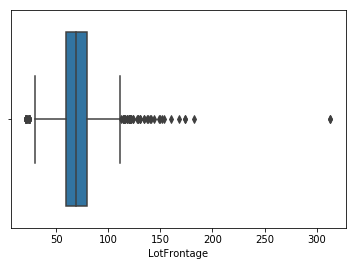

In [80]:
sns.boxplot(data_df['LotFrontage'])

In [81]:
zscore = np.abs(stats.zscore(data_df['LotFrontage']))

thresh = 4
print(np.where(zscore > thresh), zscore[np.where(zscore > thresh)])

(array([], dtype=int64),) []


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


We can see that out of these 7 points, points 934 and 1298 have very much larger zscore compared to others. Let's have a look at these 2 points.

In [82]:
data_df[data_df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Nothing else strikes me as out of the ordinary. They have very much lower `SalePrice` given very high `LotFrontage` and normal everything else. Let's save the identity of these data points in a list of outliers for future consideration.

In [83]:
outliers.update([outlier for outlier in list(np.where(data_df['LotFrontage'] > 300)[0]) if outlier not in outliers])

print('Running list of outliers: ', outliers)

Running list of outliers:  {934, 523, 1298, 691, 1182}


Let's have a look at the test set.

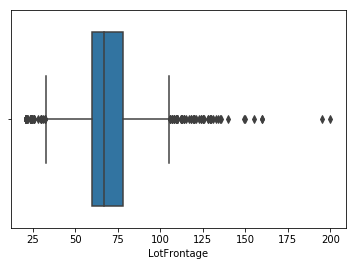

In [84]:
sns.boxplot(test_df['LotFrontage'])

Although there are some points close to 200 that look out of the ordinary, these points are quite within range of the training data, so they should be OK.

### GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual

From my experience, this missing values are expectedly filled with `None`, that is, the houses don't have a garage. Therefore, let's check the `GarageArea`.

In [85]:
data_df['GarageArea'].isnull().sum(), data_df['GarageArea'].mean(), data_df['GarageArea'].median()

(0, 472.9801369863014, 480.0)

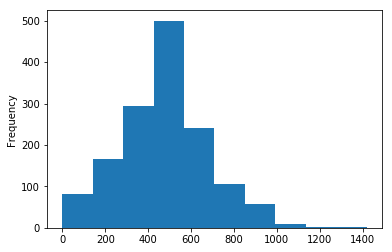

In [86]:
data_df['GarageArea'].plot.hist()

OK there is no missing value in `GarageArea`, and it appears that most houses have a garage. The distribution looks pretty health. In addidtion, it's indeed true that all the missing values come from houses without a garage, and should therefore be filled with `None`.

In [87]:
# Check if there is any house with missing values in the garage category with nonzero garage area
len(data_df[(data_df['GarageArea']!=0) & ((data_df['GarageCond'].isnull()) | 
                                          (data_df['GarageType'].isnull()) | 
                                          (data_df['GarageYrBlt'].isnull()) | 
                                          (data_df['GarageFinish'].isnull()) | 
                                          (data_df['GarageQual'].isnull()))])

0

In [88]:
train_df['GarageCond'].fillna('None', inplace=True)
train_df['GarageType'].fillna('None', inplace=True)
train_df['GarageYrBlt'].fillna('None', inplace=True)
train_df['GarageFinish'].fillna('None', inplace=True)
train_df['GarageQual'].fillna('None', inplace=True)

Now check the test set:

In [89]:
print('Number of missing values in garage area = ', test_df['GarageArea'].isnull().sum())

Number of missing values in garage area =  1


In [90]:
test_df[(test_df['GarageArea']!=0) & ((test_df['GarageType'].isnull()) | 
                                      (test_df['GarageYrBlt'].isnull()) | 
                                      (test_df['GarageFinish'].isnull()) | 
                                      (test_df['GarageQual'].isnull())
                                     )].loc[:, ['GarageArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']]

,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual
666,360.0,Detchd,NaN,NaN,NaN
1116,NaN,Detchd,NaN,NaN,NaN


OK the one missing value in `GarageArea` is nonzero because there is apparently a  garage type value. This value should then be filled with the median. 

In [91]:
test_df['GarageArea'].fillna(test_df['GarageArea'].median(), inplace=True)

In [92]:
print('Year most garages were built: ', test_df['GarageYrBlt'].median())
print('Year house 666 was built and year it was remodelled: ', test_df.at[666, 'YearBuilt'], test_df.at[666, 'YearRemodAdd'])
print('Year house 666 was built and year it was remodelled: ', test_df.at[1116, 'YearBuilt'], test_df.at[1116, 'YearRemodAdd'])

Year most garages were built:  1979.0
Year house 666 was built and year it was remodelled:  1910 1983
Year house 666 was built and year it was remodelled:  1923 1999


The two houses appeared to have been built in 1910 and 1923 respectively, so I guess having the garage built in 1979 is not that unreasonable. However, it's probably also reasonable to say that the garage was built when the house was remodelled?

In [93]:
test_df['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [94]:
test_df['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

As for the `GarageFinish`, fill in with `Unf` and for `GarageQual`, fill in with `TA`, although these 2 values seem to contradict.

In [95]:
test_df.at[666, 'GarageYrBlt'] = 1983
test_df.at[1116, 'GarageYrBlt'] = 1999

test_df.at[666, 'GarageFinish'] = 'Unf'
test_df.at[1116, 'GarageFinish'] = 'Unf'

test_df.at[666, 'GarageQual'] = 'TA'
test_df.at[1116, 'GarageQual'] = 'TA'

Now fill in the rest of the missing values with `None` because they don't have a garage.

In [96]:
test_df['GarageCond'].fillna('None', inplace=True)
test_df['GarageType'].fillna('None', inplace=True)
test_df['GarageYrBlt'].fillna('None', inplace=True)
test_df['GarageFinish'].fillna('None', inplace=True)
test_df['GarageQual'].fillna('None', inplace=True)

In [97]:
train_df.isnull().sum().sum()

204

### BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual

Let's look at these features. Following are the number of missing values:

In [98]:
(data_df['BsmtExposure'].isnull().sum(),
data_df['BsmtFinType2'].isnull().sum(),
data_df['BsmtFinType1'].isnull().sum(),
data_df['BsmtCond'].isnull().sum(),
data_df['BsmtQual'].isnull().sum())

(38, 38, 37, 37, 37)

It would not be surprising if (at least most of) these houses don't have a basement at all. We can check the `TotalBsmtSF` to see if the corresponding values are nonzero.

In [99]:
data_df['TotalBsmtSF'].isnull().sum()

0

There is no missing value in `TotalBsmtSF` so that's good. Now print the houses with non-zero `TotalBsmtSF` but missing values for one of the above features.

In [100]:
data_df[(data_df['TotalBsmtSF'] != 0) & ((data_df['BsmtExposure'].isnull()) | 
                                         (data_df['BsmtFinType2'].isnull()) | 
                                         (data_df['BsmtFinType1'].isnull()) |
                                         (data_df['BsmtCond'].isnull()) |
                                         (data_df['BsmtQual'].isnull())
                                        )].loc[:, ['TotalBsmtSF', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

,TotalBsmtSF,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
332,3206,No,NaN,GLQ,TA,Gd
948,936,NaN,Unf,Unf,TA,Gd


OK so apparently these two houses do have a basement. Now fill in the missing values manually for these 2.

In [101]:
data_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [102]:
data_df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [103]:
train_df.at[332, 'BsmtFinType2'] = 'Unf'
train_df.at[948, 'BsmtExposure'] = 'No'

Other missing values are filled in with `None` for no basement.

In [104]:
train_df['BsmtExposure'].fillna('None', inplace=True)
train_df['BsmtFinType2'].fillna('None', inplace=True)
train_df['BsmtFinType1'].fillna('None', inplace=True)
train_df['BsmtCond'].fillna('None', inplace=True)
train_df['BsmtQual'].fillna('None', inplace=True)

Now, check test data to see if there are missing values for these features, and if they can all be filled with `None` for no basement or must be filled in manually.

In [105]:
(test_df['BsmtExposure'].isnull().sum(),
test_df['BsmtFinType2'].isnull().sum(),
test_df['BsmtFinType1'].isnull().sum(),
test_df['BsmtCond'].isnull().sum(),
test_df['BsmtQual'].isnull().sum(),
test_df['TotalBsmtSF'].isnull().sum())

(44, 42, 42, 45, 44, 1)

In [106]:
test_df[(test_df['TotalBsmtSF'] != 0) & ((test_df['BsmtExposure'].isnull()) | 
                                         (test_df['BsmtFinType2'].isnull()) | 
                                         (test_df['BsmtFinType1'].isnull()) |
                                         (test_df['BsmtCond'].isnull()) |
                                         (test_df['BsmtQual'].isnull())
                                        )].loc[:, ['TotalBsmtSF', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']]

,TotalBsmtSF,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
27,1595.0,NaN,Unf,Unf,TA,Gd
580,1426.0,Mn,Rec,GLQ,NaN,Gd
660,NaN,NaN,NaN,NaN,NaN,NaN
725,1127.0,No,Unf,BLQ,NaN,TA
757,173.0,No,Unf,Unf,Fa,NaN
758,356.0,No,Unf,Unf,TA,NaN
888,725.0,NaN,Unf,Unf,TA,Gd
1064,995.0,Av,Unf,ALQ,NaN,TA


Manually fill in data for these 8 houses using training data. Except for number 660, where all values appear to be missing.

In [107]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
            'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
test_df.loc[660, basement]

BsmtQual        NaN
BsmtCond        NaN
BsmtExposure    NaN
BsmtFinType1    NaN
BsmtFinSF1      NaN
BsmtFinType2    NaN
BsmtFinSF2      NaN
BsmtUnfSF       NaN
TotalBsmtSF     NaN
BsmtFullBath    NaN
BsmtHalfBath    NaN
Name: 660, dtype: object

For number 660, I assume that there is no basement.

In [108]:
test_df.at[660, 'BsmtQual'] = None
test_df.at[660, 'BsmtCond'] = None
test_df.at[660, 'BsmtExposure'] = None
test_df.at[660, 'BsmtFinType1'] = None
test_df.at[660, 'BsmtFinSF1'] = 0
test_df.at[660, 'BsmtFinType2'] = None
test_df.at[660, 'BsmtFinSF2'] = 0
test_df.at[660, 'BsmtUnfSF'] = 0
test_df.at[660, 'TotalBsmtSF'] = 0
test_df.at[660, 'BsmtFullBath'] = None
test_df.at[660, 'BsmtHalfBath'] = None

In [109]:
train_df['BsmtCond'].value_counts()

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64

In [110]:
train_df['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [111]:
test_df.at[27, 'BsmtExposure'] = 'No'
test_df.at[580, 'BsmtCond'] = 'TA'
test_df.at[725, 'BsmtCond'] = 'TA'
test_df.at[757, 'BsmtQual'] = 'TA'
test_df.at[758, 'BsmtQual'] = 'TA'
test_df.at[888, 'BsmtExposure'] = 'No'
test_df.at[1064, 'BsmtCond'] = 'TA'

The rest is now filled with `None`.

In [112]:
test_df['BsmtExposure'].fillna('None', inplace=True)
test_df['BsmtFinType2'].fillna('None', inplace=True)
test_df['BsmtFinType1'].fillna('None', inplace=True)
test_df['BsmtCond'].fillna('None', inplace=True)
test_df['BsmtQual'].fillna('None', inplace=True)

### MasVnrType, MasVnrArea

How many missing values are we talking about, and are they for the same house?

In [113]:
(data_df['MasVnrType'].isnull().sum(), data_df['MasVnrArea'].isnull().sum())

(8, 8)

In [114]:
data_df[(data_df['MasVnrType'].isnull()) | (data_df['MasVnrArea'].isnull())].loc[:, ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


`MasVnrArea` has 8 missing values, which are for the same houses that have missing values for `MasVnrType`. `MasVnrArea`  describes the masonry veneer area in square feet and so it may be OK to fill in the missing values with the mean or the median. However, looking at the actual mean and  median, it shows that the data are very skewed and need a second look. This is an example showing that it's safer to go with the median, and not the mean. I go with the median, which is a reasonable choice looking at the distribution plot.

In [115]:
data_df['MasVnrArea'].mean()

103.68526170798899

In [116]:
data_df['MasVnrArea'].median()

0.0

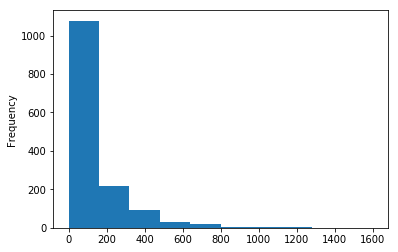

In [117]:
data_df['MasVnrArea'].plot.hist()

Percentage of houses with 0 masonry veneer area:

In [118]:
len(data_df[data_df['MasVnrArea'] == 0])/len(data_df['MasVnrArea'])

0.5897260273972603

Because these 8 houses have 0 masonry veneer area, the corresponding values for `MasVnrType` should be `None`.

In [119]:
train_df['MasVnrArea'].fillna(0, inplace=True)

In [120]:
train_df['MasVnrType'].fillna('None', inplace=True)

Now let's have a look at the test set.

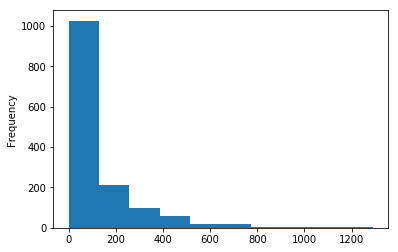

In [121]:
test_df['MasVnrArea'].plot.hist()

In [122]:
print('Number of missing values in MasVnrType ', test_df['MasVnrType'].isnull().sum(), 'and MasVnArea ', test_df['MasVnrArea'].isnull().sum())

Number of missing values in MasVnrType  16 and MasVnArea  15


In [123]:
test_df[(test_df['MasVnrType'].isnull()) |
        (test_df['MasVnrArea'].isnull())].loc[:, ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


It appears that there is 1 house with a nonzero `MasVnrArea` but nodata on `MasVnrType`, the missing value thus should be filled with some median value from the set. The rest should be filled with `None`.

In [124]:
test_df['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [125]:
test_df.at[1150, 'MasVnrType'] = 'BrkFace'
test_df['MasVnrType'].fillna('None', inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(), inplace=True)

### Electrical

There is one missing value. that perhaps should just be filled with the most common type.

In [126]:
print('Number of missing values = ', data_df['Electrical'].isnull().sum())

Number of missing values =  1


In [127]:
data_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [128]:
train_df['Electrical'].fillna('Sbrkr', inplace=True)

Let's have a look at the test set.

In [129]:
print('Number of missing values = ', test_df['Electrical'].isnull().sum())

Number of missing values =  0


### Final check for missing values

Now check if there are still missing values in the training data.

In [130]:
train_df.isnull().sum().sum()

0

However, looking at the test set, there are still a number of missing values. Check what those features are:

In [131]:
test_df.columns[np.where(test_df.isnull().sum() != 0)]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType'],
      dtype='object')

Filling in these missing data with the median values.

In [132]:
test_df['MSZoning'].fillna('RL', inplace=True)
test_df['Utilities'].fillna('AllPub', inplace=True)
test_df['Exterior1st'].fillna('VinylSd', inplace=True)
test_df['Exterior2nd'].fillna('VinylSd', inplace=True)
test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)
test_df['KitchenQual'].fillna('TA', inplace=True)
test_df['Functional'].fillna('Typ', inplace=True)
test_df['GarageCars'].fillna(2, inplace=True)
test_df['SaleType'].fillna('WD', inplace=True)

In [133]:
test_df.isnull().sum().sum()

0

### Drop Id, SalePrice

In [134]:
train_df.drop(columns=['Id', 'SalePrice'], inplace=True)
test_df.drop(columns=['Id'], inplace=True)

In [135]:
train_df.shape, test_df.shape

((1460, 77), (1459, 77))

### Process outliers

In [136]:
print('Current list of outliers ', list(outliers))

Current list of outliers  [934, 523, 1298, 691, 1182]


In [137]:
train_df.drop(index=list(outliers), inplace=True)

In [138]:
data_df.drop(index=list(outliers), inplace=True)

### Process categorical features

In [139]:
dummies = pd.get_dummies(pd.concat((train_df, test_df), axis=0))

In [140]:
dummies.shape

(2914, 395)

In [141]:
X = dummies.iloc[:train_df.shape[0]]
X_test = dummies.iloc[train_df.shape[0]:]

In [142]:
X.shape, X_test.shape

((1455, 395), (1459, 395))

## 6 - Train models with cross validation

In [143]:
y = np.log(data_df['SalePrice'] + 1)

Normalizing features aren't necessary in this problem.

In [144]:
GBR3 = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=150, max_depth=4, random_state=0)
cv_score = cross_val_score(GBR3, X, y, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 0.1208923655110811


In [145]:
RF3 = RandomForestRegressor(n_estimators=100, max_features=20, random_state=0)
cv_score2 = cross_val_score(RF3, X, y, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score2).mean())

Cross validation scores for GBR model: 0.14393708060126928


Random forest doesn't appear to do as well. I'm going to try to submit the result using GBR and see how it goes.

In [146]:
GBR3.fit(X, y)
y_pred = np.exp(GBR3.predict(X_test)) - 1
answer = pd.DataFrame(data=y_pred, columns=['SalePrice'])
answer.insert(loc=0, column='Id', value=test_data_df['Id'])

answer.to_csv('data/submission_v2.csv', index=False)

This submission improves my score quite significantly compared to the naive attempt previously, but still leaves much room for improvement at 0.13055.